In [1]:
pip install gradio

     |████████████████████████████████| 979 kB 5.1 MB/s 
     |████████████████████████████████| 206 kB 56.2 MB/s 
     |████████████████████████████████| 2.0 MB 30.3 MB/s 
     |████████████████████████████████| 961 kB 62.8 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 3.6 MB 55.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=9661d56766a7f97e3282c3a91189cd5d5798d883221c8446047bcb5c2b02d6ee
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=bd61d29a3582bfcf42e512626d5eb9401983cc0da56d40affcfc8f891797aa6c
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import gradio
import gradio as gr

In [3]:
import zipfile
import os

In [4]:
!wget --no-check-certificate \
    "https://github.com/shivisharma2k/animal/archive/refs/heads/main.zip" \
    -O "/tmp/animal.zip"


zip_ref = zipfile.ZipFile('/tmp/animal.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2021-12-14 04:35:20--  https://github.com/shivisharma2k/animal/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/shivisharma2k/animal/zip/refs/heads/main [following]
--2021-12-14 04:35:20--  https://codeload.github.com/shivisharma2k/animal/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/animal.zip’

/tmp/animal.zip         [      <=>           ] 447.40M  25.2MB/s    in 19s     

2021-12-14 04:35:39 (24.0 MB/s) - ‘/tmp/animal.zip’ saved [469132145]



/tmp/animal-main/rhino/212.jpg


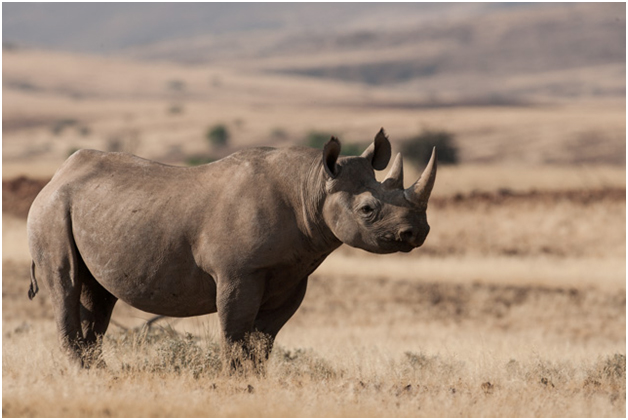

In [5]:
import PIL
import pathlib
data_dir = pathlib.Path('/tmp/animal-main')
RH = list(data_dir.glob('rhino/*'))
print(RH[0])
PIL.Image.open(str(RH[0]))

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1504 files belonging to 4 classes.
Using 1204 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1504 files belonging to 4 classes.
Using 300 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['buffalo', 'elephant', 'rhino', 'zebra']


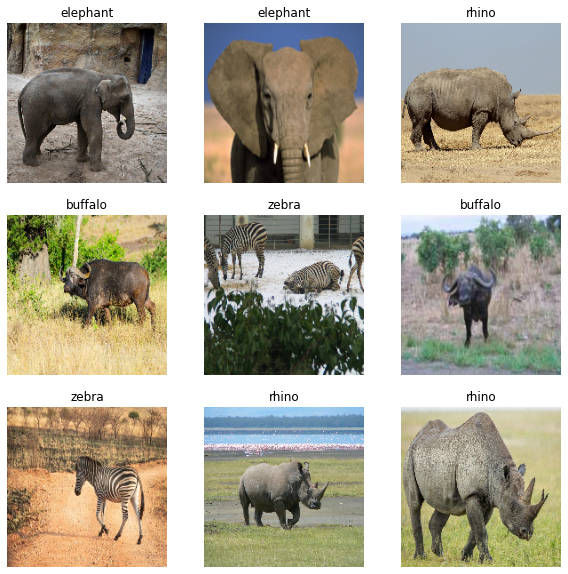

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #rescaling the input to new range
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 [==============================] - 49s 1s/step - loss: 1.4306 - accuracy: 0.3870 - val_loss: 1.0645 - val_accuracy: 0.5067
Epoch 2/10
38/38 [==============================] - 48s 1s/step - loss: 0.9697 - accuracy: 0.5673 - val_loss: 0.9314 - val_accuracy: 0.5767
Epoch 3/10
38/38 [==============================] - 48s 1s/step - loss: 0.7659 - accuracy: 0.6869 - val_loss: 0.9332 - val_accuracy: 0.5667
Epoch 4/10
38/38 [==============================] - 48s 1s/step - loss: 0.6285 - accuracy: 0.7467 - val_loss: 0.7676 - val_accuracy: 0.6867
Epoch 5/10
38/38 [==============================] - 48s 1s/step - loss: 0.4865 - accuracy: 0.8148 - val_loss: 0.8740 - val_accuracy: 0.6767
Epoch 6/10
38/38 [==============================] - 48s 1s/step - loss: 0.3561 - accuracy: 0.8804 - val_loss: 0.7537 - val_accuracy: 0.7000
Epoch 7/10
38/38 [==============================] - 48s 1s/step - loss: 0.2295 - accuracy: 0.9261 - val_loss: 0.9169 - val_accuracy: 0.6833
Epoch 8/10
38/38 [=============

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://53645.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
